In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.8 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00


In [5]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
##print(langsmith)


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


In [6]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [7]:
from langchain_groq import ChatGroq

In [8]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e69135937d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e6913742450>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

Start Building Chatbot Using Langgraph

In [9]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END ###STATEGRAPH
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages] ####APPENDING MESSAGES AND ON EVERY ADD WE WILL CHANGE THE STATE

graph_builder=StateGraph(State)


In [17]:
graph_builder ## RESPONSIBLE FOR MANAGING STATE

In [22]:
#### FOR CREATING ANY NODE WE HAVE TO MENTION STATE AS PARAMETER SO FOR CHATBOT WE ARE GIVING PARAMETER
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [24]:
graph_builder = StateGraph(State)

In [25]:
graph_builder.add_node("chatbot", chatbot)

In [26]:
graph_builder

In [27]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [28]:
graph=graph_builder.compile()

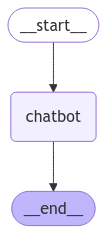

In [29]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [31]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001902278, 'queue_time': 0.019465851, 'total_time': 0.030993187}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-5b8204fd-ddc4-4268-8094-29812e4ab7db-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001902278, 'queue_time': 0.019465851, 'total_time': 0.030993187}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-5b8204f